In [1]:
import pandas as pd
import xml.etree.ElementTree as et 

xtree = et.parse("/home/fsociety/Documents/Precog/stackoverflow.com/Tags.xml")
xroot = xtree.getroot()
chil = list(xroot.getchildren())
# df_cols= ['Id','TagName','Count','ExcerptPostId','WikiPostId']
df_cols = list(chil[0].attrib.keys())

rows = []


for node in xroot: 
    
    res = []
    i=0
    while i < len(df_cols):
        i+=1
        res.append(node.attrib.get(df_cols[i-1]))
#         print(node.attrib.get(df_cols[i-1]))

    rows.append({df_cols[i]: res[i] 
                 for i, _ in enumerate(df_cols)})

out_df = pd.DataFrame(rows, columns=df_cols)

<ipython-input-1-0ae49832608a>:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  chil = list(xroot.getchildren())


In [2]:
out_df

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,.net,293379,3624959,3607476
1,2,html,970699,3673183,3673182
2,3,javascript,1955557,3624960,3607052
3,4,css,649436,3644670,3644669
4,5,php,1335050,3624936,3607050
...,...,...,...,...,...
57459,143155,next-jdbc,1,None,None
57460,143156,android-jetpack-security,1,60470204,60470203
57461,143157,android-kotlin,0,None,None
57462,143158,swashbuckle.aspnetcore,1,None,None


In [3]:
out_df['Count'] = out_df['Count'].astype(int) 

In [4]:
out_df.sort_values(by=['Count'], inplace=True, ascending=False)

In [5]:
out_df

,Id,TagName,Count,ExcerptPostId,WikiPostId
2,3,javascript,1955557,3624960,3607052
11,17,java,1641102,3624966,3607018
6,9,c#,1385220,3624962,3607007
10,16,python,1359126,3624965,3607014
4,5,php,1335050,3624936,3607050
...,...,...,...,...,...
55486,140544,jmeter-to-k6,1,58309597,58309596
55487,140546,convox,1,None,None
57463,143159,pointdns,1,None,None
57436,143130,key-vault,0,None,None


In [6]:
out_df.head(10)

,Id,TagName,Count,ExcerptPostId,WikiPostId
2,3,javascript,1955557,3624960,3607052
11,17,java,1641102,3624966,3607018
6,9,c#,1385220,3624962,3607007
10,16,python,1359126,3624965,3607014
4,5,php,1335050,3624936,3607050
675,1386,android,1254482,3625001,3607484
406,820,jquery,978412,3625262,3607053
1,2,html,970699,3673183,3673182
7,10,c++,656969,3624963,3606997
3,4,css,649436,3644670,3644669


<AxesSubplot:xlabel='TagName'>

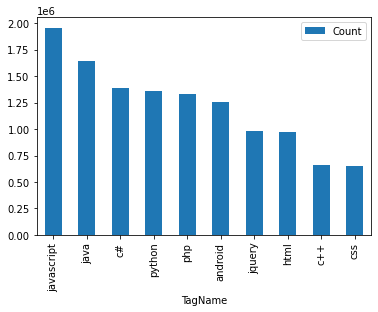

In [7]:
out_df.head(10).plot(x="TagName",y="Count", kind="bar")

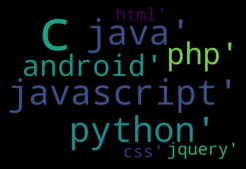

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = out_df.head(10).TagName.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (6, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

